<a href="https://colab.research.google.com/github/Hamlet-be/20240422_Gastcollege/blob/main/Demo_SpatialDataEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Pythonic way: Spatial Data Engineering

## 1. Import Packages

In [ ]:
import os
import pandas as pd
import geopandas as gpd
import pandas as pd
import numpy as np
import fiona
from  ipyleaflet import Map , GeoData, basemaps, LayersControl
from ipywidgets import Layout

## 1. Extract data

### Administrative boundaries
[Dataset Administratieve eenheden - actuele toestand](https://www.geo.be/catalog/details/fb1e2993-2020-428c-9188-eb5f75e284b9?l=nl)

In [ ]:
# adminvector - Geo data
adminvector_zip = r'https://ac.ngi.be/remoteclient-open/GeoBePartners-open/NGI-IGN/AdminVector/fb1e2993-2020-428c-9188-eb5f75e284b9_geopackage+sqlite3_4326.zip'
adminVector_gdf = gpd.read_file(adminvector_zip)

In [ ]:
adminVector_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tgid       2664 non-null   object        
 1   namefre    1514 non-null   object        
 2   namedut    1144 non-null   object        
 3   nameger    25 non-null     object        
 4   modifdate  2664 non-null   datetime64[ns]
 5   pseudonis  2664 non-null   object        
 6   geometry   2664 non-null   geometry      
dtypes: datetime64[ns](1), geometry(1), object(5)
memory usage: 145.8+ KB


In [ ]:
adminVector_gdf.head()

tgid       namefre namedut nameger  \
0  {EF7A9DB5-B87A-4484-ACAF-18BF3707EE5A}          None  Dessel    None   
1  {BF777660-81AF-475E-8237-AC54EECEC73C}       Laforêt    None    None   
2  {C36A783C-22DD-4691-9E56-BFCDE8810AA1}      Sorinnes    None    None   
3  {6DE143D6-84F9-4944-9685-86D4052D8C98}  Grapfontaine    None    None   
4  {7BCE12E4-C02E-4007-85E3-9E5D21755109}   Saint-Léger    None    None   

   modifdate   pseudonis                              geometry  
0 2020-08-17      13006A    POINT Z (5.11187 51.23906 0.00000)  
1 2020-09-07  91143A-III  POINT Z (4.92992 49.86272 227.37232)  
2 2020-09-09      91034D  POINT Z (4.98235 50.26030 284.50810)  
3 2021-09-15      84043D  POINT Z (5.41942 49.81991 463.92115)  
4 2023-10-02      57027C   POINT Z (3.31404 50.70573 33.86422)

Typical GIS dataset that has different layers....
Let's try to find out what's inside this geopackage file. You can go to the URL and click to download..... But this is not reproducable and not scalable...Let's try another way with the urllib library

In [ ]:
# urllib package: interface for fetching data across the web
import urllib.request
import zipfile
path = '/content'
zipFile = 'adminvector.zip'
# urlretrieve performs a GET request + save data locally
urllib.request.urlretrieve(url=adminvector_zip, filename = os.path.join(path,zipFile))
# use as much as possible context manager to allocate and release resources
# init dictionary to store gpkg name and layer
allLayers = dict()
with zipfile.ZipFile(zipFile) as zf:
    for aFile in zf.namelist():
        with zf.open(aFile) as f:
            allLayers[aFile]= fiona.listlayers(f)
print(allLayers)

In [ ]:
municipality_gdf =  gpd.read_file(adminvector_zip, layer='municipality')
statisticalsector_gdf = gpd.read_file(adminvector_zip, layer='statisticalsector')

In [ ]:
statisticalsector_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tgid       20460 non-null  object        
 1   modifdate  20460 non-null  datetime64[ns]
 2   niscode    20460 non-null  object        
 3   geometry   20460 non-null  geometry      
dtypes: datetime64[ns](1), geometry(1), object(2)
memory usage: 639.5+ KB


In [ ]:
municipality_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tgid                   581 non-null    object        
 1   modifdate              581 non-null    datetime64[ns]
 2   arrondissementcapital  581 non-null    bool          
 3   provincecapital        581 non-null    bool          
 4   regioncapital          581 non-null    bool          
 5   countrycapital         581 non-null    bool          
 6   niscode                581 non-null    object        
 7   city                   581 non-null    int64         
 8   languagestatute        581 non-null    int64         
 9   nameger                581 non-null    object        
 10  namefre                581 non-null    object        
 11  namedut                581 non-null    object        
 12  geometry               581 non-null    geometry      
dt

### Inhabitants
[Dataset Bevolking per statistische sector - 2023](https://data.gov.be/en/node/401444)

In [ ]:
# Bevolking per statistische sector 2023 - Flat txt file
inhabitants_2023_zip = r'https://statbel.fgov.be/sites/default/files/files/opendata/bevolking/sectoren/OPENDATA_SECTOREN_2023.zip'
# record: row of fields or attributes, column: feature or attribute, separator: |
inhabitants_2023_df = pd.read_csv(inhabitants_2023_zip, sep='|')
inhabitants_2023_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20376 entries, 0 to 20375
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CD_REFNIS            20376 non-null  int64 
 1   CD_SECTOR            20376 non-null  object
 2   TOTAL                20376 non-null  int64 
 3   DT_STRT_SECTOR       20376 non-null  object
 4   DT_STOP_SECTOR       20376 non-null  object
 5   OPPERVLAKKTE IN HM²  20376 non-null  object
 6   TX_DESCR_SECTOR_NL   20376 non-null  object
 7   TX_DESCR_SECTOR_FR   20376 non-null  object
 8   TX_DESCR_NL          20376 non-null  object
 9   TX_DESCR_FR          20376 non-null  object
 10  TX_DESCR_SECTOR_NLL  20373 non-null  object
 11  TX_DESCR_SECTOR_FRR  20373 non-null  object
 12  SECTOR               20376 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.0+ MB


In [ ]:
inhabitants_2023_df.head()

CD_REFNIS  CD_SECTOR  TOTAL DT_STRT_SECTOR DT_STOP_SECTOR  \
0      11001  11001A00-   2489      01Mar1981      31Dec9999   
1      11001  11001A01-   2827      01Mar1981      31Dec9999   
2      11001  11001A020    761      01Mar1981      31Dec9999   
3      11001  11001A030    466      01Mar1981      31Dec9999   
4      11001  11001A042    363      01Mar1981      31Dec9999   

   OPPERVLAKKTE IN HM²  TX_DESCR_SECTOR_NL  TX_DESCR_SECTOR_FR TX_DESCR_NL  \
0            53.158956  AARTSELAAR-CENTRUM  AARTSELAAR-CENTRUM  Aartselaar   
1            67.115758        DE LEEUWERIK        DE LEEUWERIK  Aartselaar   
2            28.084816           BUERSTEDE           BUERSTEDE  Aartselaar   
3            42.812540            YSSELAAR            YSSELAAR  Aartselaar   
4            25.562366       KLEINE GRIPPE       KLEINE GRIPPE  Aartselaar   

  TX_DESCR_FR TX_DESCR_SECTOR_NLL TX_DESCR_SECTOR_FRR SECTOR  
0  Aartselaar  AARTSELAAR-CENTRUM  AARTSELAAR-CENTRUM   A00-  
1  Aartselaar        DE LEEUWERIK        DE LEEUWERIK   A01-  
2  Aartselaar           BUERSTEDE           BUERSTEDE   A020  
3  Aartselaar            YSSELAAR            YSSELAAR   A030  
4  Aartselaar       KLEINE GRIPPE       KLEINE GRIPPE   A042

## 2. Transform data

### Check & Transform data types

In [ ]:
# OPPERVLAKKTE IN HM²  20376 non-null  object - Convert to Float
#inhabitants_2023_df.dtypes
inhabitants_2023_df['OPPERVLAKKTE IN HM²'] = inhabitants_2023_df['OPPERVLAKKTE IN HM²'].astype(float)

In [ ]:
inhabitants_2023_df['OPPERVLAKKTE IN HM²'] = inhabitants_2023_df['OPPERVLAKKTE IN HM²'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [ ]:
inhabitants_2023_df.dtypes

CD_REFNIS               object
CD_SECTOR               object
TOTAL                    int64
DT_STRT_SECTOR          object
DT_STOP_SECTOR          object
OPPERVLAKKTE IN HM²    float64
TX_DESCR_SECTOR_NL      object
TX_DESCR_SECTOR_FR      object
TX_DESCR_NL             object
TX_DESCR_FR             object
TX_DESCR_SECTOR_NLL     object
TX_DESCR_SECTOR_FRR     object
SECTOR                  object
dtype: object

In [ ]:
# Make CD_REFNIS the same type (object / String) as niscode in other datasets
inhabitants_2023_df.CD_REFNIS = inhabitants_2023_df.CD_REFNIS.astype(str)

### Geo-enable the inhabitants dataset with the boundaries of the statistical sector

- Check the number of records of the two datasets

In [ ]:
assert len(inhabitants_2023_df.index) == len(statisticalsector_gdf.index), 'Number of records are not identicall'

AssertionError: Number of records are not identicall

In [ ]:
print(f'# inhabitants: {len(inhabitants_2023_df.index)}')
print(f'# statisticalsectors: {len(statisticalsector_gdf.index)}')

# inhabitants: 20376
# statisticalsectors: 20460


- Check CD_SECTOR and niscode fields

In [ ]:
if not set(inhabitants_2023_df.CD_SECTOR) == set(statisticalsector_gdf.niscode):
    print(f'CD_SECTOR in inhabitants_2023 is unique: {inhabitants_2023_df.CD_SECTOR.is_unique}')
    print(f'niscode in statisticalsector_gdf is unique: {statisticalsector_gdf.niscode.is_unique}')

CD_SECTOR in inhabitants_2023 is unique: True
niscode in statisticalsector_gdf is unique: False


- Identify niscode duplicates

In [ ]:
statisticalsectors_duplicates_gdf = statisticalsector_gdf[statisticalsector_gdf.duplicated(subset='niscode', keep=False)].sort_values(by=['niscode'])
statisticalsectors_duplicates_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1237 entries, 1040 to 20454
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tgid       1237 non-null   object        
 1   modifdate  1237 non-null   datetime64[ns]
 2   niscode    1237 non-null   object        
 3   geometry   1237 non-null   geometry      
dtypes: datetime64[ns](1), geometry(1), object(2)
memory usage: 48.3+ KB


In [ ]:
statisticalsectors_duplicates_gdf.head()

tgid           modifdate    niscode  \
1040  {8B3EA899-F0C1-4B87-B693-2E2CC1696072} 2023-12-04 16:50:35  11002A081   
1048  {41249EA6-CEF3-46D6-AF17-0A032DFFEB45} 2023-12-04 16:50:35  11002A081   
1126  {ED272DFD-302A-4AD2-8EB8-C7A41D49663E} 2023-12-04 16:50:35  11002J072   
1125  {D0DA6C47-FA6F-40FF-A99A-983DF45E56CC} 2023-12-04 16:50:35  11002J072   
1127  {7AEF36ED-EF56-4D51-B8BE-C9FF033EC29E} 2023-12-04 16:50:35  11002J80-   

                                               geometry  
1040  POLYGON Z ((4.39875 51.22369 0.00000, 4.39812 ...  
1048  POLYGON Z ((4.39155 51.21380 0.00000, 4.39122 ...  
1126  POLYGON Z ((4.41439 51.23212 0.00000, 4.41592 ...  
1125  POLYGON Z ((4.40893 51.23453 0.00000, 4.40895 ...  
1127  POLYGON Z ((4.42778 51.23827 0.00000, 4.42794 ...

- Visual check

<Axes: >

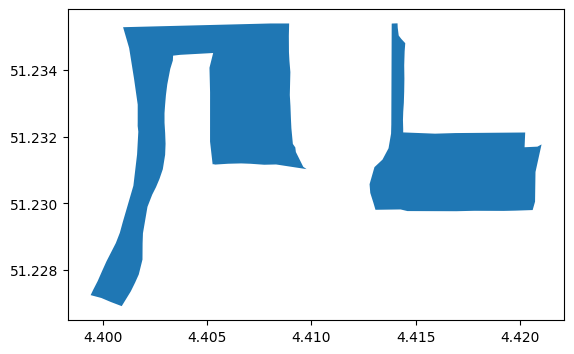

In [ ]:
statisticalsectors_duplicates_gdf[statisticalsectors_duplicates_gdf['niscode']=='11002J072'].plot()

- Dissolve statistical sectors into Multipolygon

In [ ]:
statisticalsectors_dissolved_gdf = statisticalsector_gdf[['niscode', 'geometry']].dissolve(by='niscode')
statisticalsectors_dissolved_gdf.head()

geometry
niscode                                                     
11001A00-  POLYGON Z ((4.39247 51.13717 0.00000, 4.39519 ...
11001A01-  POLYGON Z ((4.39374 51.13858 0.00000, 4.39356 ...
11001A020  POLYGON Z ((4.37785 51.13689 0.00000, 4.37634 ...
11001A030  POLYGON Z ((4.39140 51.14451 0.00000, 4.39057 ...
11001A042  POLYGON Z ((4.39374 51.13858 0.00000, 4.39350 ...

In [ ]:
statisticalsectors_dissolved_gdf.loc['11002J072']

geometry    MULTIPOLYGON Z (((4.40895 51.23427 0.00000, 4....
Name: 11002J072, dtype: geometry

In [ ]:
print(f'# inhabitants: {len(inhabitants_2023_df.index)}')
print(f'# statisticalsectors: {len(statisticalsectors_dissolved_gdf.index)}')


# inhabitants: 20376
# statisticalsectors: 19795


In [ ]:
# statisticalsectors_dissolved_gdf -> index 2 column
statisticalsectors_dissolved_gdf.reset_index(inplace=True, names=['CD_SECTOR'] )

In [ ]:
statisticalsectors_dissolved_gdf.head()

CD_SECTOR                                           geometry
0  11001A00-  POLYGON Z ((4.39247 51.13717 0.00000, 4.39519 ...
1  11001A01-  POLYGON Z ((4.39374 51.13858 0.00000, 4.39356 ...
2  11001A020  POLYGON Z ((4.37785 51.13689 0.00000, 4.37634 ...
3  11001A030  POLYGON Z ((4.39140 51.14451 0.00000, 4.39057 ...
4  11001A042  POLYGON Z ((4.39374 51.13858 0.00000, 4.39350 ...

- Combine datasets

In [ ]:
inhabitants_2023_df_geom_left = pd.merge(inhabitants_2023_df, statisticalsectors_dissolved_gdf, on='CD_SECTOR', how='left')
inhabitants_2023_df_geom_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20376 entries, 0 to 20375
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CD_REFNIS            20376 non-null  object  
 1   CD_SECTOR            20376 non-null  object  
 2   TOTAL                20376 non-null  int64   
 3   DT_STRT_SECTOR       20376 non-null  object  
 4   DT_STOP_SECTOR       20376 non-null  object  
 5   OPPERVLAKKTE IN HM²  20376 non-null  float64 
 6   TX_DESCR_SECTOR_NL   20376 non-null  object  
 7   TX_DESCR_SECTOR_FR   20376 non-null  object  
 8   TX_DESCR_NL          20376 non-null  object  
 9   TX_DESCR_FR          20376 non-null  object  
 10  TX_DESCR_SECTOR_NLL  20373 non-null  object  
 11  TX_DESCR_SECTOR_FRR  20373 non-null  object  
 12  SECTOR               20376 non-null  object  
 13  geometry             19789 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(11)
memory usage: 2.2+ MB

In [ ]:
# inhabitants niscode with missing geometry
inhabitants_2023_df_geom_left_withoutgeom = inhabitants_2023_df_geom_left[inhabitants_2023_df_geom_left.geometry.isna()][['CD_SECTOR', 'TOTAL', 'TX_DESCR_SECTOR_NL']]
inhabitants_2023_df_geom_left_withoutgeom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, 16 to 20375
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CD_SECTOR           587 non-null    object
 1   TOTAL               587 non-null    int64 
 2   TX_DESCR_SECTOR_NL  587 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.3+ KB


In [ ]:
inhabitants_2023_df_geom_left_withoutgeom

CD_SECTOR  TOTAL                 TX_DESCR_SECTOR_NL
16     11001ZZZZ      2  NIET TE LOKALISEREN IN EEN SECTOR
114    11002J8AN   2899                  AN-LUCHTBAL-NOORD
153    11002P2AN      0                            EK-LAAR
154    11002P2AP   1272                       EK-LUCASWIJK
187    11002Q2PP      9                ME-MERKSEMSE POLDER
...          ...    ...                                ...
20134  93018ZZZZ      0  NIET TE LOKALISEREN IN EEN SECTOR
20186  93022ZZZZ      0  NIET TE LOKALISEREN IN EEN SECTOR
20251  93056ZZZZ      2  NIET TE LOKALISEREN IN EEN SECTOR
20333  93088ZZZZ      4  NIET TE LOKALISEREN IN EEN SECTOR
20375  93090ZZZZ      0  NIET TE LOKALISEREN IN EEN SECTOR

[587 rows x 3 columns]

- Convert to GeoPandas DataFrame

In [ ]:
inhabitants_2023_gdf = gpd.GeoDataFrame(inhabitants_2023_df_geom_left, geometry='geometry', crs='EPSG:4326')
inhabitants_2023_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20376 entries, 0 to 20375
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CD_REFNIS            20376 non-null  object  
 1   CD_SECTOR            20376 non-null  object  
 2   TOTAL                20376 non-null  int64   
 3   DT_STRT_SECTOR       20376 non-null  object  
 4   DT_STOP_SECTOR       20376 non-null  object  
 5   OPPERVLAKKTE IN HM²  20376 non-null  float64 
 6   TX_DESCR_SECTOR_NL   20376 non-null  object  
 7   TX_DESCR_SECTOR_FR   20376 non-null  object  
 8   TX_DESCR_NL          20376 non-null  object  
 9   TX_DESCR_FR          20376 non-null  object  
 10  TX_DESCR_SECTOR_NLL  20373 non-null  object  
 11  TX_DESCR_SECTOR_FRR  20373 non-null  object  
 12  SECTOR               20376 non-null  object  
 13  geometry             19789 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(11)
memory usage:

- Visual check: Plot neighborhood of Gent

In [ ]:
niscode_Gent = municipality_gdf[municipality_gdf.namedut == 'Gent'].iloc[0].niscode
inhabitants_2023_gdf[inhabitants_2023_gdf.CD_REFNIS == niscode_Gent]

CD_REFNIS  CD_SECTOR  TOTAL DT_STRT_SECTOR DT_STOP_SECTOR  \
8566     44021  44021A00-    669      01Mar1981      31Dec9999   
8567     44021  44021A01-   2964      01Mar1981      31Dec9999   
8568     44021  44021A02-   1348      01Mar1981      31Dec9999   
8569     44021  44021A03-    900      01Mar1981      31Dec9999   
8570     44021  44021A040   2512      01Mar1981      31Dec9999   
...        ...        ...    ...            ...            ...   
8763     44021  44021M37-   1413      01Mar1981      31Dec9999   
8764     44021  44021M472    181      01Mar1981      31Dec9999   
8765     44021  44021M49-      4      01Mar1981      31Dec9999   
8766     44021  44021M57-      1      01Mar1981      31Dec9999   
8767     44021  44021ZZZZ    289      01Mar1981      31Dec9999   

      OPPERVLAKKTE IN HM²                 TX_DESCR_SECTOR_NL  \
8566            20.356161                               KUIP   
8567            31.100363                        SINT-JACOBS   
8568            24.065357                             KOUTER   
8569            10.408299                          PATERSHOL   
8570            38.437992                              BRIEL   
...                   ...                                ...   
8763           317.845085                WONDELGEMSE MEERSEN   
8764           117.033426                       LANGERBRUGGE   
8765           446.472570                          PACHTGOED   
8766            88.512034                              RIEME   
8767             0.000000  NIET TE LOKALISEREN IN EEN SECTOR   

                   TX_DESCR_SECTOR_FR TX_DESCR_NL TX_DESCR_FR  \
8566                             KUIP        Gent        Gand   
8567                      SINT-JACOBS        Gent        Gand   
8568                           KOUTER        Gent        Gand   
8569                        PATERSHOL        Gent        Gand   
8570                            BRIEL        Gent        Gand   
...                               ...         ...         ...   
8763              WONDELGEMSE MEERSEN        Gent        Gand   
8764                     LANGERBRUGGE        Gent        Gand   
8765                        PACHTGOED        Gent        Gand   
8766                            RIEME        Gent        Gand   
8767  NON LOCALISABLE DANS UN SECTEUR        Gent        Gand   

                    TX_DESCR_SECTOR_NLL              TX_DESCR_SECTOR_FRR  \
8566                               KUIP                             KUIP   
8567                        SINT-JACOBS                      SINT-JACOBS   
8568                             KOUTER                           KOUTER   
8569                          PATERSHOL                        PATERSHOL   
8570                              BRIEL                            BRIEL   
...                                 ...                              ...   
8763                WONDELGEMSE MEERSEN              WONDELGEMSE MEERSEN   
8764                       LANGERBRUGGE                     LANGERBRUGGE   
8765                          PACHTGOED                        PACHTGOED   
8766                              RIEME                            RIEME   
8767  NIET TE LOKALISEREN IN EEN SECTOR  NON LOCALISABLE DANS UN SECTEUR   

     SECTOR                                           geometry  
8566   A00-  POLYGON Z ((3.72967 51.05289 0.00000, 3.72947 ...  
8567   A01-  POLYGON Z ((3.72929 51.05999 0.00000, 3.72983 ...  
8568   A02-  POLYGON Z ((3.72832 51.05164 0.00000, 3.72803 ...  
8569   A03-  POLYGON Z ((3.72570 51.05974 0.00000, 3.72552 ...  
8570   A040  POLYGON Z ((3.72458 51.06024 0.00000, 3.72360 ...  
...     ...                                                ...  
8763   M37-  POLYGON Z ((3.74684 51.11337 0.00000, 3.74627 ...  
8764   M472  POLYGON Z ((3.78167 51.14906 0.00000, 3.78144 ...  
8765   M49-  POLYGON Z ((3.79548 51.17120 0.00000, 3.79527 ...  
8766   M57-  POLYGON Z ((3.80227 51.18648 0.00000, 3.80280 ...  
8767   ZZZZ                       

In [ ]:
# Filter municipality_gdf
municipality_gdf = municipality_gdf[['niscode', 'namedut', 'geometry']]

In [ ]:
lon = municipality_gdf[municipality_gdf.niscode == niscode_Gent].iloc[0].geometry.centroid.x
lat = municipality_gdf[municipality_gdf.niscode == niscode_Gent].iloc[0].geometry.centroid.y
m = Map(center=(lat, lon), zoom=10, scroll_wheel_zoom=True, layout=Layout(width='50%', height='500px'), basemap= basemaps.Esri.WorldTopoMap)
geo_data_inhabitants = GeoData(geo_dataframe = inhabitants_2023_gdf[inhabitants_2023_gdf.CD_REFNIS == niscode_Gent], style={'color': 'gray', 'weight':1}, name='Niswijken')
geo_data_municipality_Gent = GeoData(geo_dataframe = municipality_gdf[municipality_gdf.niscode == niscode_Gent], style={'color': 'black', 'weight':1.5}, name = 'Gent')
m.add(geo_data_inhabitants)
m.add(geo_data_municipality_Gent)
control = LayersControl(position='topright')
m.add(control)
m

Map(center=[51.07446172835691, 3.7255292509450886], controls=(ZoomControl(options=['position', 'zoom_in_text',…

## 3. Load data
For this exercise we are going to save the result for Gent and all the neighboring municipalities of Gent

In [ ]:
# Define the Zone Of Interest: niscode of Gent and all the neighboring municipalities
polygon_of_gent = municipality_gdf[municipality_gdf.niscode == niscode_Gent].iloc[0].geometry
neighbors_gdf = municipality_gdf[municipality_gdf.geometry.touches(polygon_of_gent)]
geo_data_municipality_neighbors = GeoData(geo_dataframe = neighbors_gdf, style={'color': 'red', 'weight':1.5}, name = 'Neighbors')
m.add(geo_data_municipality_neighbors)

Map(bottom=87924.0, center=[51.07446172835691, 3.7255292509450886], controls=(ZoomControl(options=['position',…

In [ ]:
niscode_zoi =  pd.concat([neighbors_gdf.niscode, municipality_gdf[municipality_gdf.niscode == niscode_Gent].niscode]).to_list()
niscode_zoi

['44083',
 '44012',
 '44013',
 '44019',
 '44085',
 '44034',
 '44040',
 '44043',
 '44064',
 '43018',
 '44073',
 '44021']

- Save result in a format used by data scientists like geojson or parquet.



### Inhabitants

In [ ]:
# GeoJSON
%%time
inhabitantsGeoJSONFile = 'inhabitants_zoi_2023.geojson'
inhabitants_2023_gdf[(inhabitants_2023_gdf.CD_REFNIS.isin(niscode_zoi)) & ~(inhabitants_2023_gdf.geometry.isna())].to_file(os.path.join(path,inhabitantsGeoJSONFile), driver="GeoJSON")

CPU times: user 832 ms, sys: 23.8 ms, total: 856 ms
Wall time: 855 ms


In [ ]:
# Parquet
%%time
inhabitantsParquetFile = 'inhabitants_zoi_2023.parquet'
inhabitants_2023_gdf[(inhabitants_2023_gdf.CD_REFNIS.isin(niscode_zoi)) & ~(inhabitants_2023_gdf.geometry.isna())].to_parquet(os.path.join(path,inhabitantsParquetFile), schema_version = '0.4.0')

CPU times: user 30.7 ms, sys: 7 ms, total: 37.7 ms
Wall time: 36.9 ms


### Municipalities

In [ ]:
# GeoJSON
municipalitiesGeoJSONFile = 'municipalities_zoi_2023.geojson'
municipality_gdf[municipality_gdf.niscode.isin(niscode_zoi)].to_file(os.path.join(path,municipalitiesGeoJSONFile), driver="GeoJSON")

In [ ]:
# Parquet
municipalitiesParquetFile = 'municipalities_zoi_2023.parquet'
municipality_gdf[municipality_gdf.niscode.isin(niscode_zoi)].to_parquet(os.path.join(path,municipalitiesParquetFile), schema_version = '0.4.0')